# Data Wrangling & EDA | Twitter | HK NLP Project

# Table of Contents
* [1.0 Wrangling](#Data_wrangling)
  * [1.1 Contents](#wrangle_contents)
  * [1.2 Imports & Set Up](#imports)
  * [1.3 Initial Scraping before Regex](#int_scrape)
  * [1.4 Regex](#regex)
     * [1.4.1 Other User Mentions](#oum)
     * [1.4.2 HTML tags](#htmltags)
     * [1.4.3 Emoji's](#emojis)
     * [1.4.4 Profanity](#profanity)
     * [1.4.5 Foreign Language(s)](#flanguage)
     * [1.4.6 Stop Words](#stop_words) 
     * [1.4.7 Tweet Length](#tweet_length) 
     * [1.4.8 Number of Hashtags](#num_hashtags) 
  * [1.5 Putting the Data to the Side](#pts)
* [2.0 Exploratory Data Analysis (EDA)](#eda)
  * [2.1 Contents](#eda_contents)
  * [2.2 xxxxxxxxxxxxxx](#_____)
  * [2.3 xxxxxxxxxxxxxx](#_____)
  * [2.4 xxxxxxxxxxxxxx](#_____)
  * [2.5 xxxxxxxxxxxxxx](#_____)
  * [2.6 xxxxxxxxxxxxxx](#_____)
  * [2.7 xxxxxxxxxxxxxx](#_____)
  * [2.8 xxxxxxxxxxxxxx](#_____)
  * [2.9 xxxxxxxxxxxxxx](#_____)
  * [2.10 Pulling them together](#1.15_ptt)
 

# **1.1 Contents**<a id='wrangle_contents'></a>

This is where you will summarize your intent. Mention you used `twint`

# **1.2 Imports & Set Up**<a id='imports'></a>

In [158]:
# Main Imports
import os
import sys
import numpy as np
import statistics
from scipy import stats
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.dates as mdates
import matplotlib.ticker as ticker
from matplotlib.pyplot import figure
%matplotlib inline
import datetime
import warnings
warnings.filterwarnings("ignore")
%reload_ext watermark

# NLP Imports
import re
import string
import nltk
import pickle
import emoji
from better_profanity import profanity
from nltk import sent_tokenize, word_tokenize
from nltk.stem.snowball import SnowballStemmer
from nltk.stem.wordnet import WordNetLemmatizer
from nltk.tokenize.casual import TweetTokenizer
from nltk.corpus import stopwords
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from gensim.corpora.dictionary import Dictionary
from gensim.models.tfidfmodel import TfidfModel
from collections import Counter
import spacy
nltk.download("stopwords")
stopwords = stopwords.words('english')
ps= nltk.PorterStemmer()

results = Counter()

# from polyglot.text import Text

# The below 2 may be required
# import nltk
# nltk.download('stopwords')
# nltk.download('averaged_perceptron_tagger')
# nltk.download('maxent_ne_chunker')
# nltk.download('words')

# Still importing twint
import twint
import nest_asyncio
nest_asyncio.apply()

%watermark -d -t -v -p pandas

Python implementation: CPython
Python version       : 3.8.5
IPython version      : 7.19.0

pandas: 1.1.3



[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\rands\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [80]:
# Here I am structuring a color scale for heatmaps which will be used later

cdict = {'green':  ((0.0, 0.0, 0.0),   # no red at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.8, 0.8)),  # set to 0.8 so its not too bright at 1

        'red': ((0.0, 0.8, 0.8),   # set to 0.8 so its not too bright at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0)),  # no green at 1

        'blue':  ((0.0, 0.0, 0.0),   # no blue at 0
                  (0.5, 1.0, 1.0),   # all channels set to 1.0 at 0.5 to create white
                  (1.0, 0.0, 0.0))   # no blue at 1
       }

# Create the colormap using the dictionary
GnRd = colors.LinearSegmentedColormap('GnRd', cdict)


In [4]:
cd

C:\Users\rands


In [5]:
df = pd.read_excel('./_Capstone_Two_NLP/data/_twitter/tweets.xlsx')
df = df.reset_index()
df = df.drop(columns=['Unnamed: 0','index'])

# **1.3 Initial Scraping before Regex**<a id='int_scrape'></a>

In [6]:
df.head(2)

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags
0,#FightForHongKong,2020-08-28 10:23:06 Eastern Daylight Time,ginny81025554,@benedictrogers @NOW4humanity Thanks for speak...,en,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']"
1,#FightForHongKong,2020-08-27 11:15:39 Eastern Daylight Time,dani_tasso,Razzismo e democrazia. Sfaccettature del med...,it,1,0,2,[],"['blacklivesmatter', 'fightforhongkong', 'open..."


In [7]:
len(df)

288416

In [8]:
df.shape

(288416, 10)

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 288416 entries, 0 to 288415
Data columns (total 10 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   hash            288416 non-null  object
 1   created_at      288416 non-null  object
 2   username        288416 non-null  object
 3   tweet           288416 non-null  object
 4   language        288416 non-null  object
 5   replies_count   288416 non-null  int64 
 6   retweets_count  288416 non-null  int64 
 7   likes_count     288416 non-null  int64 
 8   reply_to        288416 non-null  object
 9   hashtags        288416 non-null  object
dtypes: int64(3), object(7)
memory usage: 22.0+ MB


In [10]:
#this is confirmed above but will double confirm
df.isnull().values.any()

False

**Data Defined**

In this short section, we will highlight what the columns are referring too.

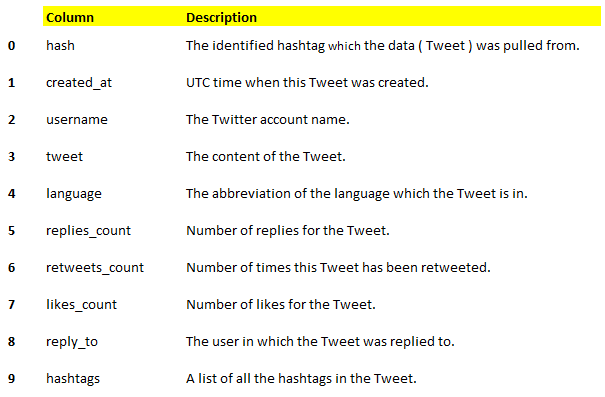

In [77]:
#Range of values per column
df.agg([min,max]).T

,min,max
hash,#FightForHongKong,#standwithhongkong
created_at,2020-05-31 00:00:00,2020-08-29 00:00:00
username,007hilo,zzzzz78395655
tweet,_watch It is the c...,🧡 #standwithHongKong by financial way.
replies_count,0,3014
retweets_count,0,16023
likes_count,0,32479
reply_to,[],"[{'screen_name': 'zz60246384', 'name': 'zz', '..."
hashtags,"['01july2020', 'internetvideo', 'hkpolicebruta...",[]


In [78]:
#Checking for nulls
df.isnull().sum()

hash              0
created_at        0
username          0
tweet             0
replies_count     0
retweets_count    0
likes_count       0
reply_to          0
hashtags          0
dtype: int64

In [11]:
#Checking the datatypes
df.dtypes

hash              object
created_at        object
username          object
tweet             object
language          object
replies_count      int64
retweets_count     int64
likes_count        int64
reply_to          object
hashtags          object
dtype: object

The `created_at` column is an object; I will convert it to `datetime`.

In [12]:
new_date = df['created_at']
new_date = new_date.str.split(expand=True)
new_date = new_date[0]
new_date = pd.to_datetime(new_date)

In [13]:
df['created_at'] = new_date
df.head(2)

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags
0,#FightForHongKong,2020-08-28,ginny81025554,@benedictrogers @NOW4humanity Thanks for speak...,en,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']"
1,#FightForHongKong,2020-08-27,dani_tasso,Razzismo e democrazia. Sfaccettature del med...,it,1,0,2,[],"['blacklivesmatter', 'fightforhongkong', 'open..."


In [14]:
df.dtypes

hash                      object
created_at        datetime64[ns]
username                  object
tweet                     object
language                  object
replies_count              int64
retweets_count             int64
likes_count                int64
reply_to                  object
hashtags                  object
dtype: object

In [15]:
#count of unique values for every column, regardless of data type
df.nunique()

hash                  12
created_at            91
username           45111
tweet             221205
language              51
replies_count        217
retweets_count       881
likes_count         1110
reply_to           27555
hashtags           77715
dtype: int64

The `hash` number looks correct as that's how many hashtags were pulled.

In [16]:
df['hash'].unique()

array(['#FightForHongKong', '#HongKongProtest', '#PrayForHongkong',
       '#WeAreNotAlone', '#nochinaextradition', '#standwithhongkong',
       '#hkprotests', '#freehongkong', '#hkpolicebrutality',
       '#hkpolicestate', '#HKpoliceterrorist', '#hkpoliceterrorism'],
      dtype=object)

The `created_at` number also looks correct as **3 months after the implimentation of the law was the range in which the tweets were pulled** .

In [17]:
print('  ',df['created_at'].min(), ' | Beginning', '\n',
     ' ',df['created_at'].max(), ' | End')

   2020-05-31 00:00:00  | Beginning 
   2020-08-29 00:00:00  | End


The `username` number also makes sense.

In [18]:
print('A single user on average tweeted',round(len(df) / len(df['username'].unique()),0), 'times in the course of 3 months.')

A single user on average tweeted 6.0 times in the course of 3 months.


Most of the others aren't important but I believe **the `tweet` number should align with the length of the data frame to ensure there are no duplicates.**

In [19]:
print('There may be', "{:,}".format(len(df) - len(df['tweet'].unique())), 'duplicates to look into.')

There may be 67,211 duplicates to look into.


We will take a **look at where duplicates** may be found with the **`tweet` column**. Our initial focus is on **when a "tweeter"** (also known a person) **used multiple hashtags**.

A seperate data frame will be used to ensure the original is not compromised.

In [20]:
df_tweets = df.copy()
df_tweets = pd.DataFrame(df_tweets)
len(df_tweets)

288416

In [21]:
duplicated_tf = df_tweets.duplicated(subset=['tweet'])
duplicated_tf = pd.DataFrame(duplicated_tf)
len(duplicated_tf)

288416

In [22]:
duplicated_tf.columns = ['Duplicated']
duplicated_tf.tail(3)

,Duplicated
288413,False
288414,False
288415,True


In [23]:
num = {True:1,False:0}
duplicated_tf['Duplicated_TorF'] = duplicated_tf['Duplicated'].map(num)
duplicated_tf.tail(3)

,Duplicated,Duplicated_TorF
288413,False,0
288414,False,0
288415,True,1


In [24]:
duplicated_tf = duplicated_tf.drop(columns=['Duplicated'])

In [25]:
df_tweets_w_dup = pd.concat([df_tweets,duplicated_tf],
                    axis = 1, ignore_index=False)
df_tweets_w_dup = df_tweets_w_dup.reset_index(drop=True)

In [26]:
df_tweets_w_dup.tail(2)

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags,Duplicated_TorF
288414,#hkpoliceterrorism,2020-05-31,bluedreamsplan2,@OzraeliAvi China try hard to link up the #Min...,en,0,0,1,"[{'screen_name': 'OzraeliAvi', 'name': 'Avi Ye...","['minnesotariots', 'hongkongprotests', 'minnia...",0
288415,#hkpoliceterrorism,2020-05-31,jack83352493,#HongKongProtest #StandwithHK #HKPoliceTerrori...,und,0,0,0,[],"['hongkongprotest', 'standwithhk', 'hkpolicete...",1


In [27]:
print(' Ensuring we have the same # of tweets after classification.','\n', 
      round((( ( len(df_tweets_w_dup) / len(df) ) - 1 ) * 100)), '| This should be a Zero change','\n',
     df_tweets_w_dup['Duplicated_TorF'].nunique(), '| The Duplicated Column should have 2 unique values 0,1')

 Ensuring we have the same # of tweets after classification. 
 0 | This should be a Zero change 
 2 | The Duplicated Column should have 2 unique values 0,1


Ok. Let's take a quick look at some of these duplicates.

In [28]:
len(df_tweets_w_dup)

288416

In [29]:
df_tweets_w_dup.loc[df_tweets_w_dup['Duplicated_TorF'] == 1].sort_values(by=['tweet'])

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags,Duplicated_TorF
240604,#freehongkong,2020-06-28,lilacrhk,https://t.co/01A6CwhNfM #standardwithHK #Sta...,und,0,0,0,[],"['standardwithhk', 'standwithhongkong', 'freeh...",1
176495,#hkprotests,2020-06-20,jjjlll,https://t.co/1EqQV5LDL5 #HongKong #HKProtests...,und,0,0,2,[],"['hongkong', 'hkprotests', 'fightforfreedom', ...",1
261737,#hkpolicebrutality,2020-06-13,1238cheng,https://t.co/1kz5fmNGWx #StandWithHongKong #...,en,0,0,0,[],"['standwithhongkong', 'hkpolicebrutality']",1
174843,#hkprotests,2020-08-29,ksin1984,https://t.co/2FxZRKLRuf #save12hkyouth #Stan...,und,0,1,3,[],"['save12hkyouth', 'standwithhongkong', 'hkprot...",1
211971,#freehongkong,2020-07-17,lilacrhk,https://t.co/2Gao97jVzl #StandWithHongKong #...,und,0,0,0,[],"['standwithhongkong', 'standwithhk', 'freehong...",1
...,...,...,...,...,...,...,...,...,...,...,...
216138,#freehongkong,2020-07-13,oneeyeh,🤬🤬🤬🤬😭😭😭 #FreeHongKong #StandWithHongKong ht...,und,0,0,0,[],"['freehongkong', 'standwithhongkong']",1
280873,#hkpolicestate,2020-06-12,can_johnhk,🤯That’s just insane. He obviously thinks #Blac...,en,0,0,0,[],"['blacklivesmatter', 'hkpolicebrutality', 'hkp...",1
236528,#freehongkong,2020-07-01,nick86544272,🥂 #FreeHongKong #StandWithHongKong https://t...,und,0,0,0,[],"['freehongkong', 'standwithhongkong']",1
198442,#freehongkong,2020-08-07,kvckelvin123,🥲 #Policebruatlity #StandWithHongKong #FreeHon...,und,0,0,0,[],"['policebruatlity', 'standwithhongkong', 'free...",1


In [30]:
len(df_tweets_w_dup)

288416

I would now like to **investigate the languages herein.**

<AxesSubplot:xlabel='Language Abbrevation', ylabel='# of observed Tweets'>

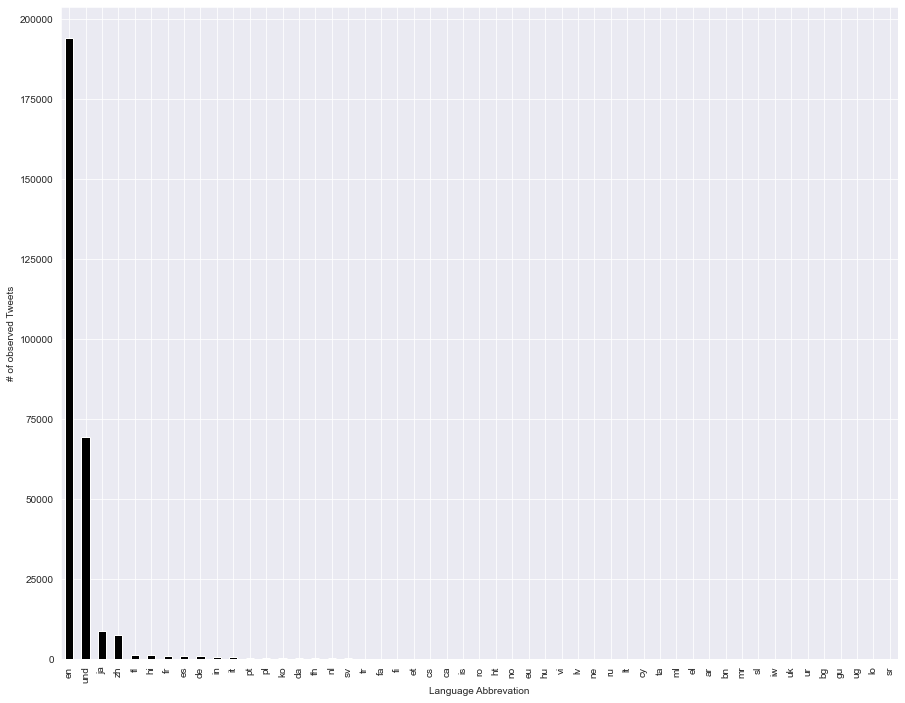

In [31]:
sns.set_style('darkgrid')
lang = pd.value_counts(df_tweets_w_dup['language'].values, sort=True)
lang = lang.sort_values(ascending=False)
plt.subplots(figsize=(15, 12))
plt.ylabel('# of observed Tweets')
plt.xlabel('Language Abbrevation')
lang.plot.bar(color='black')

In [32]:
df_tweets_w_dup['language'].value_counts().head(10)

en     194087
und     69375
ja       8715
zh       7327
tl       1254
hi       1207
fr       1046
es        908
de        892
in        507
Name: language, dtype: int64

In [33]:
lang_count = df_tweets_w_dup['language']
round(lang_count.value_counts(normalize=True),2).head()

en     0.67
und    0.24
ja     0.03
zh     0.03
tl     0.00
Name: language, dtype: float64

**`en` & `und` is contributing 91%. While `zh`'s (Mandarin Chinese) contribution is only 3%, Mandarin Chinese is important; I will unfortunately have to pass as 3% is unlikely to move the analysis outcome.**

**`und` refers to unknown. I am unsure as to what implications removing would do. Let's see what is "unknown".**

In [34]:
df_tweets_w_dup[df_tweets_w_dup['language'].str.contains('und')]['tweet'].head(25)

9       https://t.co/8lgfzmGtav   #lukashenko #Tikhan...
17     #FreeAgness #FightForFreedom #StandWithHongKon...
18     #Hongkongers  #hongkong #beijing #china #HongK...
20     #boycottchina #hongkong #freehk #boycottmulan ...
21      https://t.co/B5KWeYZE6t #boycottchina #hongko...
33     #umbrellamovement #hongkongprotest #hkhumanrig...
37            #FightForHongKong  https://t.co/C5dAXctB7X
39                   @yasmine_bw19 #FightForHongKong ✨✋🏼
40     #香港 #hongkong #hongkongprotest #hkprotest #黑警 ...
42     #白紙文宣行動  #白紙文宣 #whitepaperterror #fightforhong...
43     @StateDept @joshuawongcf @SecPompeo ✌️#FightFo...
44     @HongKongPLG @AngelineChanHK #UnitedWeStand  #...
48                                     #fightforHongkong
50     #Hongkongers  #hongkong #KnockoutBlow #beijing...
52                  #FightForHongKong  #HongKongProtests
55     #boycottchina #hongkong #freehk #boycottmulan ...
56     #boycottchina #hongkong #freehk #boycottmulan ...
71     #StandWithKashmir #FreeP

In [35]:
df_tweets_w_dup[df_tweets_w_dup['language'].str.contains('und')]['tweet'][17]

'#FreeAgness #FightForFreedom #StandWithHongKong #fightforHONGKONG'

In [36]:
df_tweets_w_dup[df_tweets_w_dup['language'].str.contains('und')]['tweet'][21]

' https://t.co/B5KWeYZE6t #boycottchina #hongkong #freehk #boycottmulan #saynotochina #boycottbeijing #chinazi #nochinaextradition #hongkongisnotchina #standagainsttyranny #fightfordemocracy #noextradictiontochina #policebrutality #standwithhk #fightforhongkong #endpolicebrutality'

In [37]:
df_tweets_w_dup[df_tweets_w_dup['language'].str.contains('und')]['tweet'][39]

'@yasmine_bw19 #FightForHongKong ✨✋🏼'

These appear to be tweets with **only hashtags**; while that may be important & it's contribution is large, **this excerise pertains to the text.**

**Further investigation may be required** at a later date but for now, **we will unfortunately drop them as well & only keep `en`.**

In [38]:
df_tweets_w_dup_en = df_tweets_w_dup[df_tweets_w_dup['language'].str.contains("en")]

In [39]:
df_tweets_w_dup_en.tail()

,hash,created_at,username,tweet,language,replies_count,retweets_count,likes_count,reply_to,hashtags,Duplicated_TorF
288410,#hkpoliceterrorism,2020-06-01,andrewhe2,@SpokespersonCHN Ms Hua please help them. #ICa...,en,0,0,0,"[{'screen_name': 'SpokespersonCHN', 'name': 'H...","['icantbreathe', 'icantbreath', 'icantbreathea...",1
288411,#hkpoliceterrorism,2020-06-01,bluedreamsplan2,Don't fall into the trap! #HKPoliceTerrorism #...,en,0,0,0,[],"['hkpoliceterrorism', 'hongkongpolicestate', '...",0
288412,#hkpoliceterrorism,2020-06-01,villafish129,@KingJames #AllLivesMatters . #PoliceBrutality...,en,0,0,0,"[{'screen_name': 'KingJames', 'name': 'LeBron ...","['alllivesmatters', 'policebrutality', 'police...",1
288413,#hkpoliceterrorism,2020-05-31,dingdin34098358,@ajphelo @HK55020097 The HK police killed a So...,en,0,1,1,"[{'screen_name': 'ajphelo', 'name': 'Andrew J ...","['policebrutality', 'hkpoliceterrorism']",0
288414,#hkpoliceterrorism,2020-05-31,bluedreamsplan2,@OzraeliAvi China try hard to link up the #Min...,en,0,0,1,"[{'screen_name': 'OzraeliAvi', 'name': 'Avi Ye...","['minnesotariots', 'hongkongprotests', 'minnia...",0


In [40]:
print('There may be', "{:,}".format(len(df) - len(df['tweet'].unique())), 'duplicates to look into.')

There may be 67,211 duplicates to look into.


In [41]:
print('Review of the # of English articles:','\n'
    '  ',"{:,}".format( len(df_tweets_w_dup[df_tweets_w_dup.language == 'en'])), '| English count before dropping other languages','\n',
     ' ',"{:,}".format(len(df_tweets_w_dup_en)),'| Count after dropping other languages')

Review of the # of English articles: 
   194,087 | English count before dropping other languages 
   194,087 | Count after dropping other languages


That matches the above so **we will now remove duplicates.**

In [42]:
df_tweets_wout_dup_en = df_tweets_w_dup_en[df_tweets_w_dup_en['Duplicated_TorF']==0]

Confirming that worked we will bring the data frame that did not delete the duplicates back & see what the sum of the `Duplicates_TorF` column is; as a reminder, **a duplicate has a 1 & the non-Duplicate has a 0.**

In [43]:
sum(df_tweets_w_dup_en['Duplicated_TorF'])

30388

So there was ~30k identified duplicates, so what is the length of the dataframe without duplicates.

In [44]:
sum(df_tweets_wout_dup_en['Duplicated_TorF'])

0

In [45]:
duplicated_tf_next = df_tweets_wout_dup_en.duplicated(subset=['tweet'])
duplicated_tf_next = pd.DataFrame(duplicated_tf_next)
duplicated_tf_next.columns = ['Duplicated_check']
duplicated_tf_next.Duplicated_check.unique()

array([False])

**A complete list of False essentially says there are no duplicates.**

In [46]:
len(df_tweets_wout_dup_en)

163699

That's yet another cut albeit it's expected given the source in which we are working with.

**We will take a look at what percent of the original total we have left.**

In [47]:
round((( len(df_tweets_wout_dup_en) / len(df) ) * 100),2 )

56.76

**Before sending the Dataframe to Regex, we will hold on to it on the side for reference.**

In [51]:
cd

C:\Users\rands


In [52]:
df_tweets_wout_dup_en.to_excel('./_Capstone_Two_NLP/data/_twitter/_dfs_fortheside/df_tweets_wout_dup_en.xlsx')
print('Finished')

Finished


# 1.4 Regex<a id='regex'></a>

Before moving forwards, **we will send the `df_tweets_wout_dup_en` back to it's home ( `df` )** so we don't have to use a long name.

In [53]:
df = df_tweets_wout_dup_en

In [54]:
print('  ',"{:,}".format(len(df_tweets_wout_dup_en)), '| the length of the temp dataframe.','\n',
     ' ', "{:,}".format(len(df)), '| the length of our new dataframe.')

   163,699 | the length of the temp dataframe. 
   163,699 | the length of our new dataframe.


In [55]:
df.isnull().sum()

hash               0
created_at         0
username           0
tweet              0
language           0
replies_count      0
retweets_count     0
likes_count        0
reply_to           0
hashtags           0
Duplicated_TorF    0
dtype: int64

That was already believed but it's good practice to double confirm.

**`Duplicated_TorF` | Given we dropped all 1's from the column, we can drop it.** Before, we will double confirm.

In [56]:
np.unique(df['Duplicated_TorF'])

array([0], dtype=int64)

In [57]:
df = df.drop(columns=['Duplicated_TorF'])

**`language` | We will do the same with `language`**.

In [58]:
np.unique(df['language'])

array(['en'], dtype=object)

In [59]:
df = df.drop(columns=['language'])

<a id='oum'></a>**`tweets` |** First thing with **`tweets` is there are mentions to other `usernames` which aren't necessary**. Take a **look at:
   * ginny81025554's comment towards @benedictrogers** & **@NOW4humanity** 

**We don't want those words;** we will now **remove mentions to other users.**

In [60]:
df[['hash', 'created_at', 'username', 'tweet']].head(1)

,hash,created_at,username,tweet
0,#FightForHongKong,2020-08-28,ginny81025554,@benedictrogers @NOW4humanity Thanks for speak...


In [61]:
df['tweet'] = df['tweet'].str.replace("@[A-Za-z0-9]+","")

In [62]:
df[['hash', 'created_at', 'username', 'tweet']].head(1)

,hash,created_at,username,tweet
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks for speaking up for us #fridaysforfre...


<a id='htmltags'></a>**`html tags` |** The **next items to remove are `html tags`**. Take a look at an example below. 

In [63]:
df['tweet'][391]

' https://t.co/Pp6LQJKGgL  Ridiculous things happened and will keep happening in Hong Kong.  #StandWithHongKong  #FreeHongKong  #HongKongProtest'

In [64]:
df['tweet'] = df['tweet'].str.replace(r'http\S+', '')

In [65]:
df['tweet'][391]

'   Ridiculous things happened and will keep happening in Hong Kong.  #StandWithHongKong  #FreeHongKong  #HongKongProtest'

**Tweet hastags |** Tweet hashtags are **hashtags found within the tweet & in many cases used to complete sentences. We would like to ensure this does not have an impact on model performance.** These hashtags should not be confused with the `hash` column; that column is for record keeping to confirm which hashtag was used to identify relevent `tweet`s for our project.

**We will use an example from Joshua Wong (joshuawongcf)**, a notable Hong Kong activist turned politician. **Our decision to use Joshua herein should not be interpreted as showing preference or support for his cause.**

**Our decision to use a tweet from Joshua, is based on his tendency to structure tweets in the manner outlined above.**

In [66]:
df['tweet'][174973]

"[HK asylum seekers could be sent to #China's secret courts]  1. Twelve #HKers, all involved in #hkprotests, were detained by #China’s coast guard today when fleeing to #Taiwan for political asylum. All of them are now detained in #China.  "

**There you may see that the following hashtags will be converted to the below once the hashtag is removed:**:
   * #China --> China
   * #HKers --> HKers
   * #hkprotests --> hkprotests
   * #Taiwan --> Taiwan


<a id='emojis'></a>**Emojis |** Emoji or Emojis are pictograms, logograms, ideograms and smileys used in electronic messages and web pages. **They are relevant & their intentions should be preserved;** two examples shown below;
   * One where the emoji is seperated from
   * Another where it is not

**We would like to ensure that the new `emoji word` is not connected with another word.**

In [67]:
df['tweet'][22]

'Heartbreaking...😭 we have to do whatever we can do to #FightForHongKong  #StandWithHongKong'

In [68]:
df['tweet'][425]

'#Yellow Sunday🥰🥰🥰#SupportAppleDaily #WeNeedAppleDaily #YellowEconomicCircle #黃色經濟圈 #5DemandsNot1Less #StandWithHongKong #StandwithHK #FightForFreedom #SupportYellowEconomicCircle #YellowEconomy  #HongKong #HongKongProtesters #HongKongProtest #HongKongProtests #HongKonger  '

We must first build the required `def` variable to **convert the emojis to text**.

In [69]:
with open('Emoji_Dict.p', 'rb') as fp:
    Emoji_Dict = pickle.load(fp)
Emoji_Dict = {v: k for k, v in Emoji_Dict.items()}

def convert_emojis_to_word(text):
    for emot in Emoji_Dict:
        text = re.sub(r'('+emot+')', "_".join(Emoji_Dict[emot].replace(","," ").replace(":"," ").split()), text)
    return text

In [70]:
df['tweet'] =  df.tweet.apply(lambda x: convert_emojis_to_word(x))

In [71]:
df['tweet'][22]

'Heartbreaking...loudly_crying_face we have to do whatever we can do to #FightForHongKong  #StandWithHongKong'

In [72]:
df['tweet'][425]

'#Yellow Sunday🥰🥰🥰#SupportAppleDaily #WeNeedAppleDaily #YellowEconomicCircle #黃色經濟圈 #5DemandsNot1Less #StandWithHongKong #StandwithHK #FightForFreedom #SupportYellowEconomicCircle #YellowEconomy  #HongKong #HongKongProtesters #HongKongProtest #HongKongProtests #HongKonger  '

# I need to add a space before & after the Emoji conversion & additions to the Emoji_Dict is required.

<a id='profanity'></a>**Profanity |** The data frame should not contain profanity; **I will replace profanity with the word `NEGATIVE`**. I will not show examples of what was replaced herein for professional reasons.

Similar to the emoji section, we will first **need to establish a `def variable` to handle profanity.**

This **`def variable` will assign a bad word to the word NEGATIVE** to ensure **it holds weight for NLP.**

In [73]:
def clean_text(__main__):
    if __name__ == "__main__":
        text = __main__
        censor_text = profanity.censor(text, '%')
        censor_text = re.sub('%%%%','NEGATIVE',censor_text)
        return censor_text

In [74]:
df['tweet'] =  df.tweet.apply(lambda x: clean_text(x))

In [76]:
df['tweet'][900]

'  #FreeHongKong NEGATIVE china #HKIndependence  #HongKong  #Hongkongprotest'

<a id='flanguage'></a>**Foreign Languages |** Despite limiting our languages to `en`, foreign languages remain.

<a id='stop_words'></a>**Stop Words |** xxxxxxxxxxxxxxxxxxxxxxxxxxxxx.

In [ ]:
# Eleanor's other student didn't dive deep into the words.

<a id='tweet_length'></a>**tweet length |** Adding another column to see the length of tweets.

In [81]:
df_t_length = pd.DataFrame([df['tweet'].copy()]).T
df_t_length = df_t_length.convert_dtypes()
df_t_length['word_l'] = [len(x.split()) for x in df['tweet'].tolist()]
df_t_length = df_t_length.drop(columns=['tweet'])
df['#_words_tweet'] = df_t_length

In [82]:
df.head(3)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,#_words_tweet
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks for speaking up for us #fridaysforfre...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",8
2,#FightForHongKong,2020-08-25,peterhjorth_ddp,How to stop China in Hong Kong. Read the new r...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",30
3,#FightForHongKong,2020-08-24,peterhjorth_ddp,How to stop China in Hong Kong. Read the new r...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",30


<a id='num_hashtags'></a>**Number of hashtags |** Adding another column to see how many hashtags were used.

In [83]:
df_hash_num = pd.DataFrame([df['hashtags'].copy()]).T
df_hash_num = df_hash_num.convert_dtypes()
df_hash_num['hash_l'] = [len(x.split()) for x in df['hashtags'].tolist()]
df_hash_num = df_hash_num.drop(columns=['hashtags'])
df['#_hashtags'] = df_hash_num

In [84]:
df.head(3)

,hash,created_at,username,tweet,replies_count,retweets_count,likes_count,reply_to,hashtags,#_words_tweet,#_hashtags
0,#FightForHongKong,2020-08-28,ginny81025554,Thanks for speaking up for us #fridaysforfre...,0,1,2,"[{'screen_name': 'benedictrogers', 'name': 'Be...","['fridaysforfreedom', 'fightforhongkong']",8,2
2,#FightForHongKong,2020-08-25,peterhjorth_ddp,How to stop China in Hong Kong. Read the new r...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",30,13
3,#FightForHongKong,2020-08-24,peterhjorth_ddp,How to stop China in Hong Kong. Read the new r...,0,0,0,[],"['dkpol', 'kina', 'hongkongprotest', 'fightfor...",30,13


# **1.5 Putting the Data to the Side**<a id='pts'></a>

**Here we will put the data as it stands to the side**. The date just started its "journey" but it's nice to keep track of where it came from as we move along.

In [107]:
cd

C:\Users\rands


In [108]:
df.to_excel('./_Capstone_Two_NLP/data/_twitter/_dfs_fortheside/df_post_wrangling.xlsx')
print('Finished')

Finished


# **2.0 Exploratory Data Analysis (EDA)**<a id='eda'></a>

# **2.1 Contents**<a id='eda_contents'></a>

This is where you will summarize your intent. Mention you used `twint`

In [987]:
df.describe()

,replies_count,retweets_count,likes_count,#_words_tweet,#_hashtags
count,163699.000000,163699.000000,163699.000000,163699.000000,163699.000000
mean,0.570889,6.148669,11.258169,20.393277,3.267876
std,13.535243,109.366725,173.143553,12.013349,2.637373
min,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.000000,0.000000,0.000000,10.000000,1.000000
50%,0.000000,0.000000,1.000000,18.000000,3.000000
75%,0.000000,1.000000,2.000000,30.000000,4.000000
max,3014.000000,16023.000000,32479.000000,60.000000,26.000000


The **above are the numeric columns**. We will set a **new variable** to the side for the next section.

In [988]:
df_num =df[['replies_count','retweets_count','likes_count','#_words_tweet','#_hashtags']].copy()

Histograms are an excellent way to review the range and density of values for each numeric features in the data set.

array([[<AxesSubplot:title={'center':'replies_count'}>,
        <AxesSubplot:title={'center':'retweets_count'}>],
       [<AxesSubplot:title={'center':'likes_count'}>,
        <AxesSubplot:title={'center':'#_words_tweet'}>],
       [<AxesSubplot:title={'center':'#_hashtags'}>, <AxesSubplot:>]],
      dtype=object)

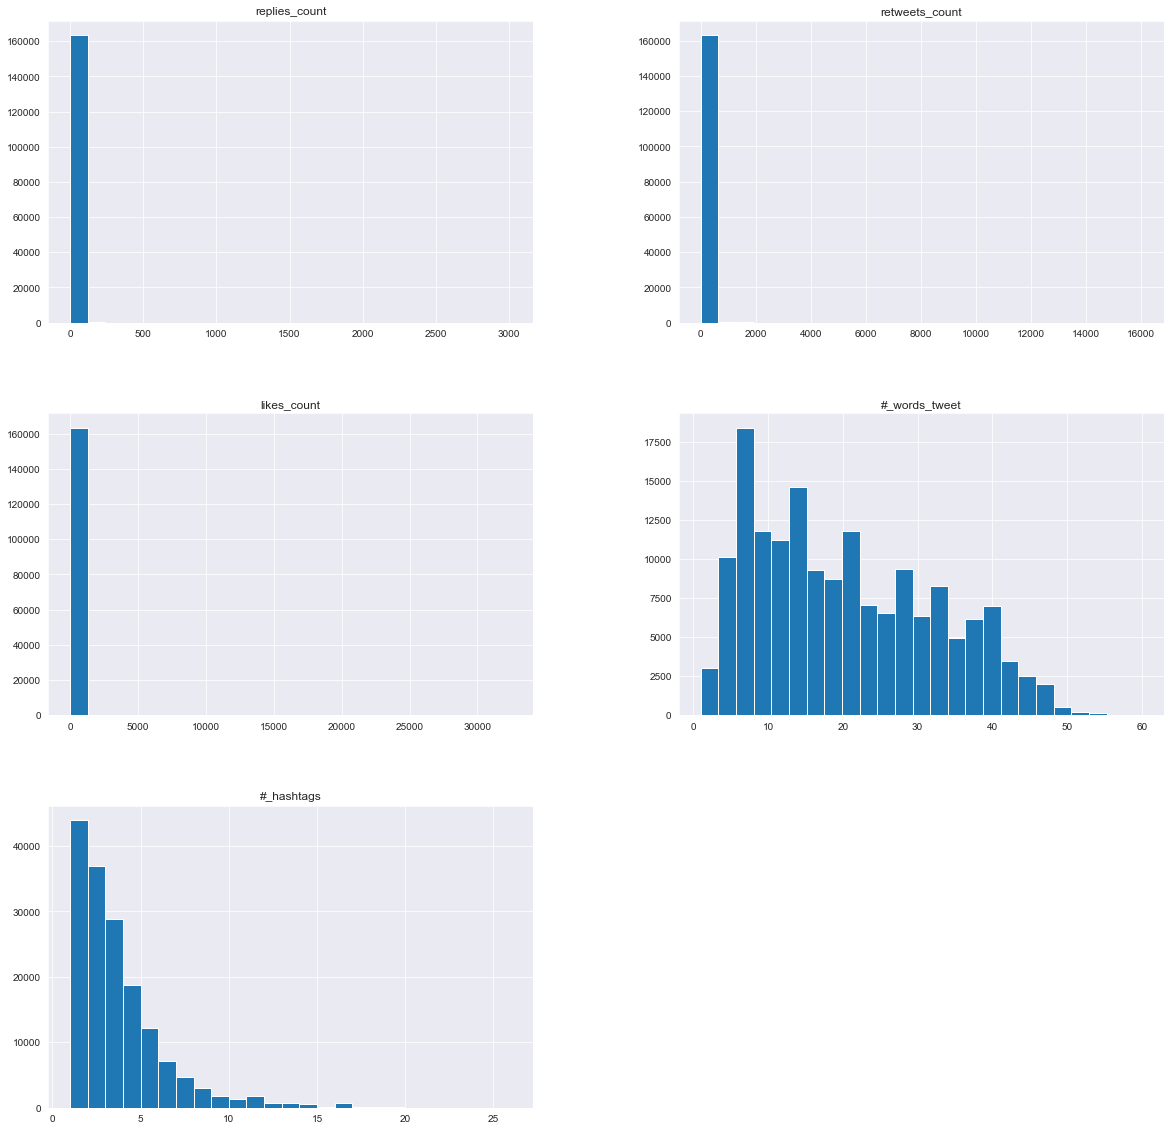

In [989]:
sns.set_style('darkgrid')
df_num.hist(bins = 25,figsize=(20,20))

<AxesSubplot:>

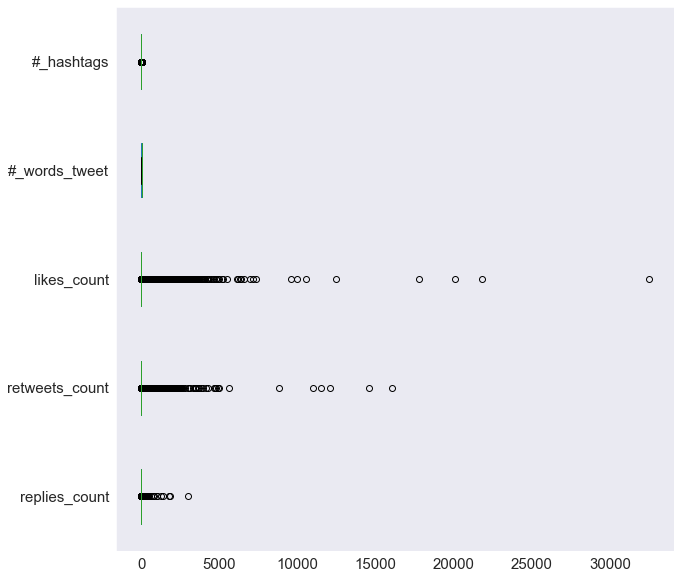

In [990]:
#Anamolies & Outliers - Review boxplots
df_num.boxplot(vert=False, grid=False, fontsize=15, figsize=(10,10))

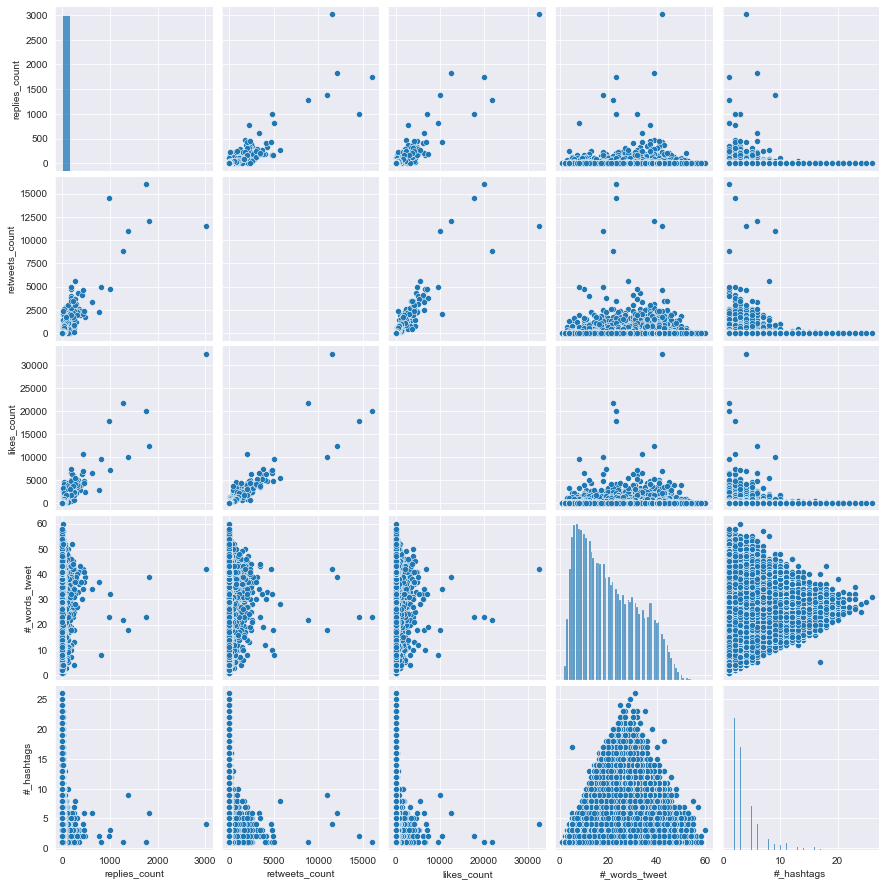

In [991]:
#Explore data relationships
sns.pairplot(df_num)


Text(0.5, 1.0, 'Twitter Numeric Heatmap')

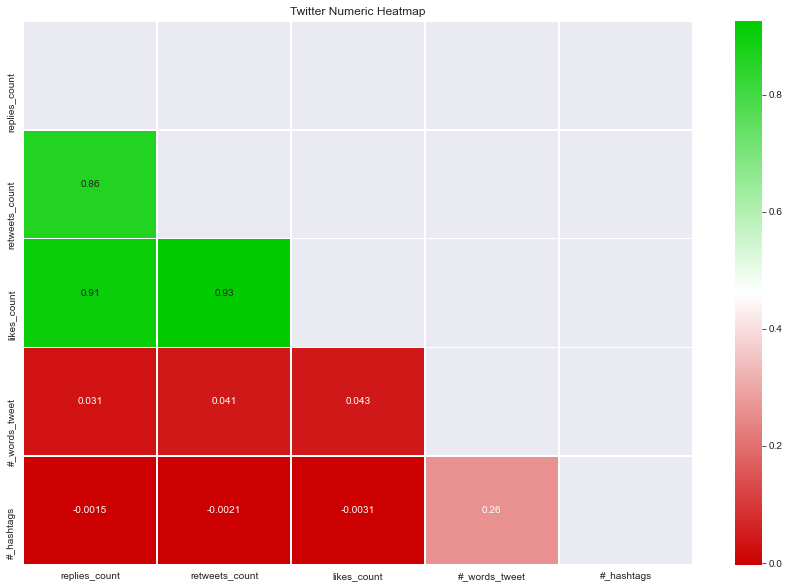

In [996]:
#Heat map - Correlation between features
plt.subplots(figsize=(15,10))
matrix = np.triu(df_num.corr())
sns.heatmap(df_num.corr(), mask=matrix, linewidths=.5, cmap=GnRd, annot=True)
plt.title('Twitter Numeric Heatmap')

The key observations here are as follows:

**Positive Correlation**
   * `Retweets` | Have a strong correlation with Likes which makes sense
      * People usually don't retweet something they don't like
   * `Replies` | Also have a strong corrlation with Likes
      * Most likely in the same rational

**No correlation**
   * `# of hashtags` | No correlation with replies, retweets or likes
      * May go against the logic of expanding your viewership by expanding the # of hashtags

**We will also take a visual look at the Tweets contribution to the data frame**.

<Figure size 1080x432 with 0 Axes>

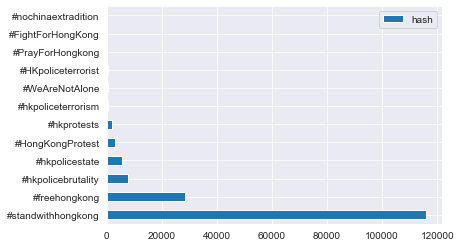

,hash,hash_pct
#standwithhongkong,115780,70.73
#freehongkong,28501,17.41
#hkpolicebrutality,7565,4.62
#hkpolicestate,5424,3.31
#HongKongProtest,2954,1.80
#hkprotests,1933,1.18
#hkpoliceterrorism,567,0.35
#WeAreNotAlone,453,0.28
#HKpoliceterrorist,325,0.20
#PrayForHongkong,133,0.08


In [1015]:
sns.set_style('darkgrid')
# Moving the number of tweets into a seperate column to identify usage
twits = pd.DataFrame(df_tweets_wout_dup_en['hash'].value_counts())

# Taking a look visually
plt.figure(figsize=(15, 6))
twits.plot.barh()
plt.show()

twits['hash_pct'] = round((( twits.hash / twits.hash.sum() ) * 100),2)
twits

The **top 2 seem to control the data frame**, shy of **~90% in 2 tweets**; simple math but would like to understand it for later use / **this is for reference.**

In [1016]:
twits['hash_pct']['#standwithhongkong'] + twits['hash_pct']['#freehongkong']

88.14

In [956]:
# df['likes_count'].describe()

**Time |** We will now see **if anything has changed during the three (3) months after the law was introduced.**

As a reminder, that was **1 June 2020.**

In [163]:
df_time = df.copy()
df_time['count'] = int(1)
df_time_daily = df_time.groupby('created_at').agg('sum')
df_time_daily = df_time_daily.reset_index()

[Text(0.5, 0, 'Day Tweeted'),
 Text(0, 0.5, 'Total Number of Tweets'),
 Text(0.5, 1.0, '# of Tweets over time')]

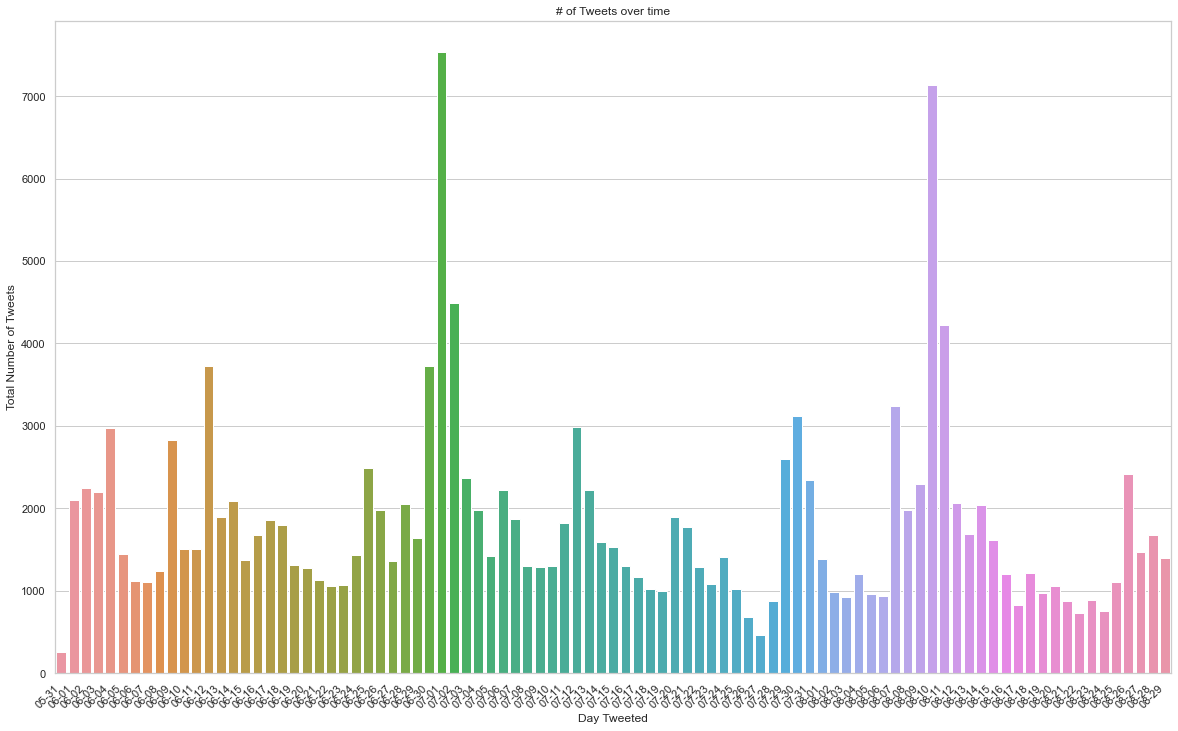

In [199]:
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="created_at", y="count", data=df_time_daily)

x_dates = df_time_daily['created_at'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

ax.set(xlabel="Day Tweeted", ylabel = "Total Number of Tweets", title='# of Tweets over time')

In [165]:
df_time_daily['count'].describe()

count      91.000000
mean     1798.890110
std      1150.315449
min       255.000000
25%      1111.000000
50%      1475.000000
75%      2078.000000
max      7537.000000
Name: count, dtype: float64

In [198]:
n = 0.95
outers = df_time_daily[df_time_daily['count'] > df_time_daily['count'].quantile(n)]

print('  There were notable outliers in the',round((n*100),0),'percentile with', "{:,}".format(df_time_daily['count'].quantile(n)), 'tweets between the following dates:')
print('\n',outers[['created_at','count']],'\n','\n',
      'It may be interesting to see what was happening at those two periods.')

  There were notable outliers in the 95.0 percentile with 3,723.5 tweets between the following dates:

    created_at  count
30 2020-06-30   3724
31 2020-07-01   7537
32 2020-07-02   4497
71 2020-08-10   7142
72 2020-08-11   4222 
 
 It may be interesting to see what was happening at those two periods.


**Rand | This is what I would like to convert the above bar chart too**

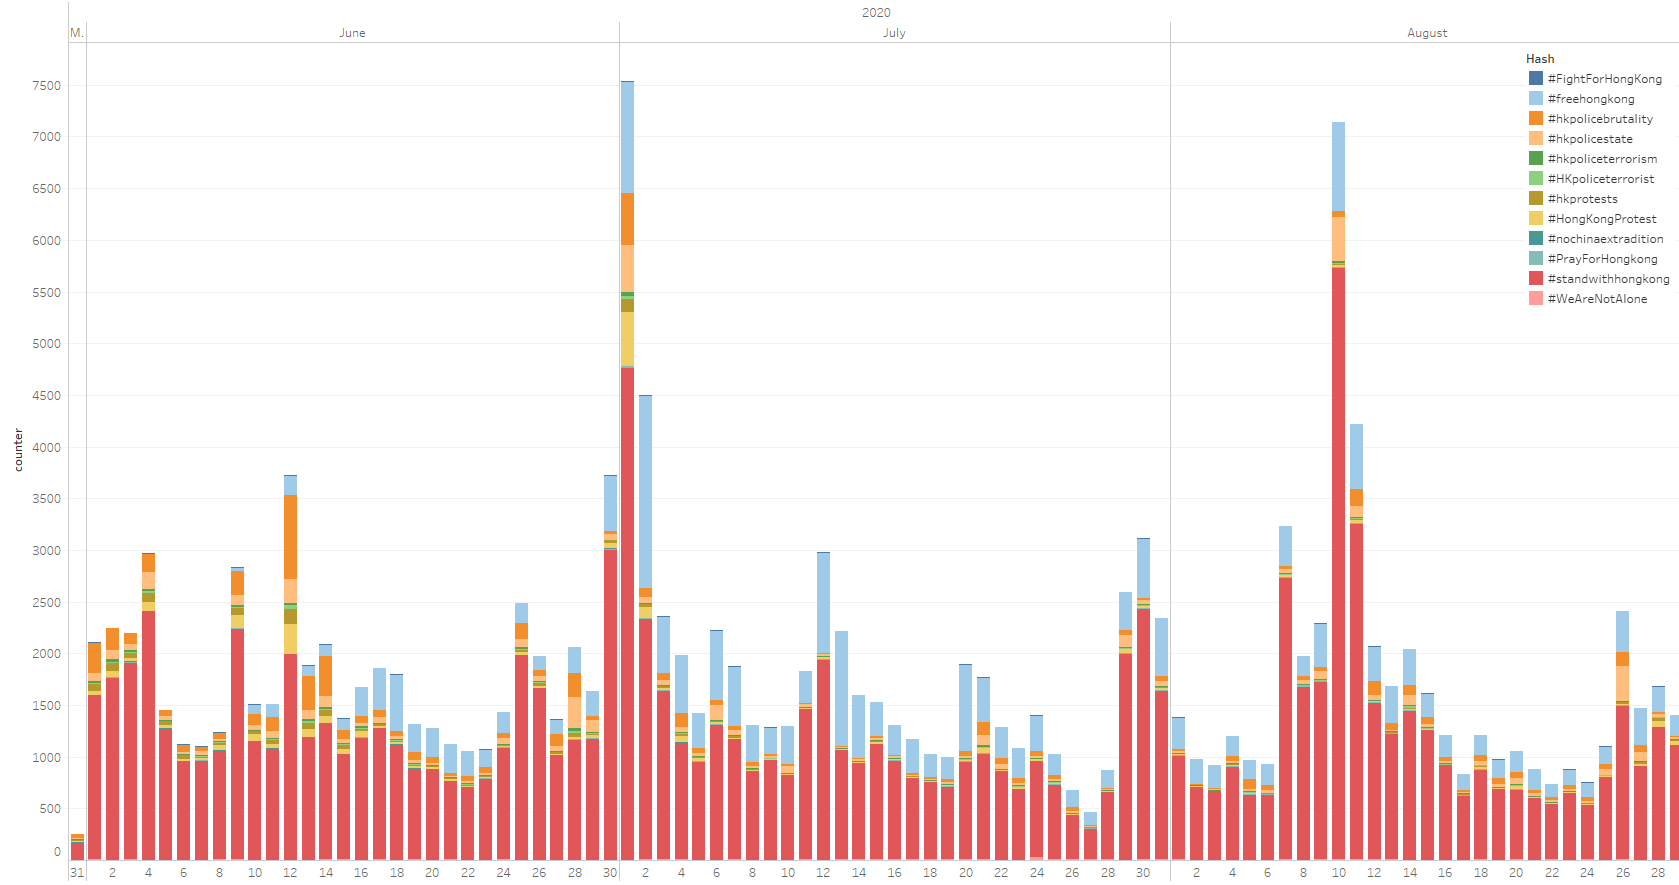

In [200]:
df_time_daily.columns

Index(['created_at', 'replies_count', 'retweets_count', 'likes_count',
       '#_words_tweet', '#_hashtags', 'count'],
      dtype='object')

[Text(0.5, 0, 'Day Tweeted'),
 Text(0, 0.5, 'Total Number of Likes'),
 Text(0.5, 1.0, '# of Tweet Likes over time')]

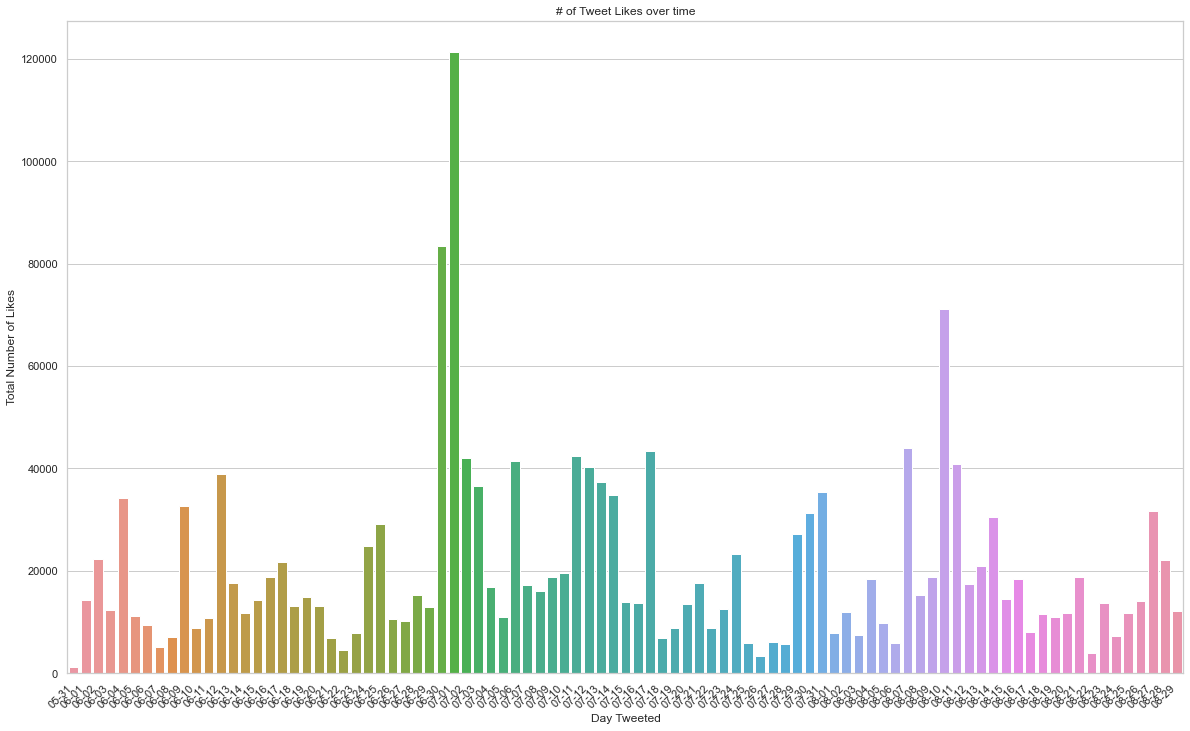

In [201]:
fig_dims = (20, 12)
fig, ax = plt.subplots(figsize=fig_dims)

sns.set_theme(style="whitegrid")
ax = sns.barplot(x="created_at", y="likes_count", data=df_time_daily)

x_dates = df_time_daily['created_at'].dt.strftime('%m-%d').sort_values().unique()
ax.set_xticklabels(labels=x_dates, rotation=45, ha='right')

ax.set(xlabel="Day Tweeted", ylabel = "Total Number of Likes", title='# of Tweet Likes over time')

Looking at the total number of likes, it looks pretty similar to tweet count.

In [204]:
df_time_daily.columns

Index(['created_at', 'replies_count', 'retweets_count', 'likes_count',
       '#_words_tweet', '#_hashtags', 'count'],
      dtype='object')

In [205]:
df_time_daily.head(2)

,created_at,replies_count,retweets_count,likes_count,#_words_tweet,#_hashtags,count
0,2020-05-31,35,434,1291,5725,954,255
1,2020-06-01,741,5939,14384,44951,6609,2105


In [ ]:
#Plot the top 10 tweets
most_hash = ted_talks[['title','main_speaker','views','speaker_occupation','film_date']].sort_values(by = 'views',ascending = False).head(10)
plt.figure(figsize = (7,7))
sns.set(font_scale = 1.2)
sns.barplot(y = 'title', x = 'views',data = most_viewed)
plt.title("Top 10 Most viewd talks")
plt.ylabel('Talks')
